# Pitch shifting 

In [9]:
import IPython
import librosa
import numpy as np

In [19]:
%%timeit

# TIME FOR LOADING A .WAV FILE

y, sr = librosa.load("e2.wav")         # y is audio array and sr is sample rate   

1.11 ms ± 59.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
# LOADING AND SLICING .WAV FILE

y, sr = librosa.load("e2.wav")         # y is audio array and sr is sample rate   

y = y[0:6000]                          # slicing first 6000 values of array

IPython.display.Audio(data=y, rate=sr) 

In [22]:
%%timeit

# TIME FOR PITCH SHIFTING THE NOTE 24 times

for i in range(0,24):     
    
    y_shift = librosa.effects.pitch_shift(y, sr, i, bins_per_octave=12)  

1.59 s ± 40.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
# PITCH SHIFTING AND CONCATENATING THE NOTE 24 times

ARRAY = np.zeros(0)      #empty array 

for i in range(0,24):     
    
    y_shift = librosa.effects.pitch_shift(y, sr, i, bins_per_octave=12)  
    
    #A step (i) is equal to a semitone if bins_per_octave is set to 12.
    
    ARRAY = np.concatenate((ARRAY, y_shift))
    
IPython.display.Audio(data=y_shift, rate=sr)

In [24]:
IPython.display.Image(url="https://i.imgur.com/59wKWkd.jpg")

# Measuring pitch

pitch = 164.55223880597015


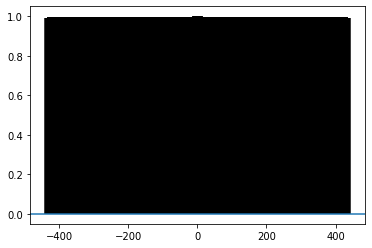

In [27]:
# useful for measuring pitch shift in numbers
# https://web.mst.edu/~kosbar/ee3430/ff/fourier/notes_pitchnames.html

import pitch

p = pitch.find_pitch('e2.wav')

print('pitch =', p)

# pysndfx

In [30]:
# 358 ms ± 1.23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

# REVERB and other effects

# ERROR 1 : [WinError 2] The system cannot find the file specified
# Fix - install soX from sourceforge, add its path to sys variables and restart pc

# full implementation - https://github.com/carlthome/python-audio-effects/blob/master/pysndfx/dsp.py


from pysndfx import AudioEffectsChain

fx = (AudioEffectsChain().reverb())
fx1 = (AudioEffectsChain().equalizer(frequency=20, q=100.0, db=-20.0))

infile = 'hello.wav'

from librosa import load
hello, sr = load(infile)
hello_reverb = fx(hello)
hello_eq = fx1(hello)

In [31]:
IPython.display.Audio(data=hello, rate=sr)

In [32]:
IPython.display.Audio(data=hello_reverb, rate=sr)